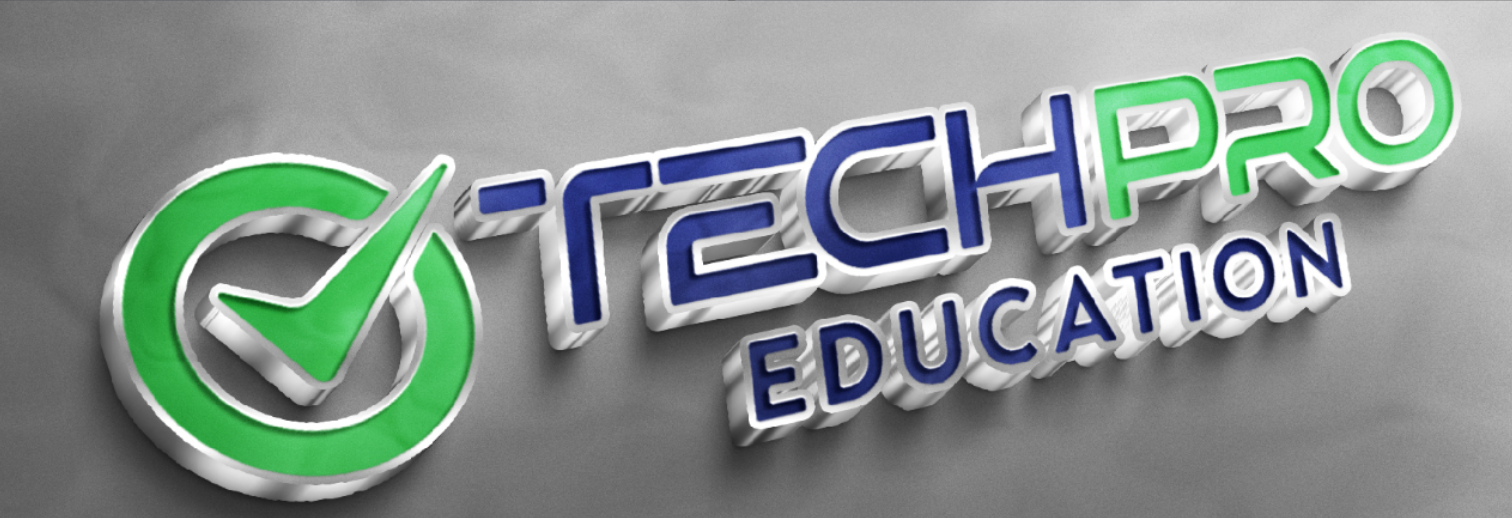

# PCA - PRINCIPAL COMPONENT ANALYSIS

- PCA is a complexity reduction technique.
- It behaves like Ridge (operates without excluding features).
- PCA = Feature Extraction (Lasso: Feature Selection).
- It is based on the variance explained ratio (with an 80% threshold).
- PCA concentrates information.
- It can be used in both Supervised and Unsupervised learning.
- There is zero multicollinearity between components.
- Scaling is necessary.

- Eating 20 kg of pomegranates or drinking 2 liters of pomegranate juice?
- The disadvantages of working with too many features.
- The flower bouquet analogy.

By obtaining new components from the existing features, it reduces dimensions. One of the aims is to make data visualization easier by reducing dimensions.

**EXAMPLES:**
It is like obtaining 2 kg of pomegranate juice from 40 kg of pomegranates. You get the vitamins, but a large portion of the mass is left out.

The PCA method is like creating a single variable, such as GDP per capita, instead of using hundreds of variables related to the economy, such as industry, agriculture, tourism, and population.

**Advantages of Dimension Reduction:**
- Reduces difficulty in EDA processes
- Shortens calculation time
- Reduces storage requirements
- Minimizes overfitting
- Minimizes challenges when fitting the model

**Disadvantages of Dimension Reduction:**
- Data loss occurs (an acceptable amount)
- Feature interpretations become more difficult

When performing dimension reduction, no feature is excluded. It pays attention to the variance between the features, reducing the number of features while creating new components. An 80% or higher explained variance is considered an acceptable threshold, and the number of components is selected accordingly. The more a feature contributes, the more it is included in the new components.

If I explain 100% of the variance with 100 features, but I can explain 90% of the variance with just 10 features, I can leave the remaining 90 features out and tolerate a 10% data loss.

Scaling is necessary.
PCA does not apply to categorical data.
The value of K is determined, which is the number of dimensions we want in the new dataset.
It can be used for both supervised and unsupervised learning.

## Clustering with PCA  
Clustering the countries based on their Happines Index Score

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import scale
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (8,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("World Happiness 2015-2019.csv")
df.head()

,Overall rank,Year,Country,Region,Score,GDP,Social_Support,Health_life_expectancy,Freedom_to_choices,Generosity,Perceptions_of_corruption
0,1,2015,Switzerland,Western Europe,7.587,1.397,1.350,0.941,0.666,0.297,0.420
1,2,2015,Iceland,Western Europe,7.561,1.302,1.402,0.948,0.629,0.436,0.141
2,3,2015,Denmark,Western Europe,7.527,1.325,1.361,0.875,0.649,0.341,0.484
3,4,2015,Norway,Western Europe,7.522,1.459,1.331,0.885,0.670,0.347,0.365
4,6,2015,Finland,Western Europe,7.406,1.290,1.318,0.889,0.642,0.234,0.414


This dataset contains the happiness levels of countries worldwide from the years 2015 to 2019. It includes the following information:
- **Overall rank:** Shows the happiness ranking of the country for that year.
- **Year:** Indicates the year the data belongs to.
- **Country:** The name of the country.
- **Region:** The region where the country is located.
- **Score:** The happiness score, calculated as a combination of the factors listed below.
- **GDP:** Gross Domestic Product per capita.
- **Social Support:** The level of social support.
- **Health Life Expectancy:** Healthy life expectancy.
- **Freedom to Choices:** The degree of freedom individuals have over their own lives.
- **Generosity:** The level of generosity.
- **Perceptions of Corruption:** The perception of corruption.

In [4]:
# Assigning the features we are using for analysis to a variable
features = ["GDP","Social_Support","Health_life_expectancy","Freedom_to_choices", "Generosity", "Perceptions_of_corruption"]

In [5]:
# setting the data types as float

df[features] = df[features].astype("float")

In [6]:
# set the overaL_rank as integer

df["Overall rank"] = df["Overall rank"].astype("int")

In [7]:
# setting the Country values as categoric

df["Country"] = df["Country"].astype("category")

In [8]:
# droping the region column as it contains null values
df= df.drop(columns=['Region'])

In [10]:
df.dtypes

Overall rank                    int64
Year                            int64
Country                      category
Score                         float64
GDP                           float64
Social_Support                float64
Health_life_expectancy        float64
Freedom_to_choices            float64
Generosity                    float64
Perceptions_of_corruption     float64
dtype: object

In [9]:
df.isnull().sum()

Overall rank                 0
Year                         0
Country                      0
Score                        0
GDP                          0
Social_Support               0
Health_life_expectancy       0
Freedom_to_choices           0
Generosity                   0
Perceptions_of_corruption    1
dtype: int64

In [11]:
df = df.dropna(subset=['Perceptions_of_corruption'])

In [12]:
# check again for null values

df.isnull().sum()

Overall rank                 0
Year                         0
Country                      0
Score                        0
GDP                          0
Social_Support               0
Health_life_expectancy       0
Freedom_to_choices           0
Generosity                   0
Perceptions_of_corruption    0
dtype: int64

In [13]:
# dividing countries to 5 categories based on their overall_rank

category = pd.qcut(df["Overall rank"], 5, labels=[ "Very Top Rank","Top rank","Middle Rank","Low Rank","Very Low Rank"])

In [14]:
# assign the class feature of the df category variable

df["class"] = category

## Scaling

When applying PCA, scaling the features is an important step to achieve more balanced and accurate results.

Features with different scales may lead to a principal component being dependent on a high variance variable, which is an undesirable situation. At this stage, **normalizing the data by applying a common scaling is essential for PCA**.

In [15]:
# Feature Scaling

df_scaled = scale(df[features ])

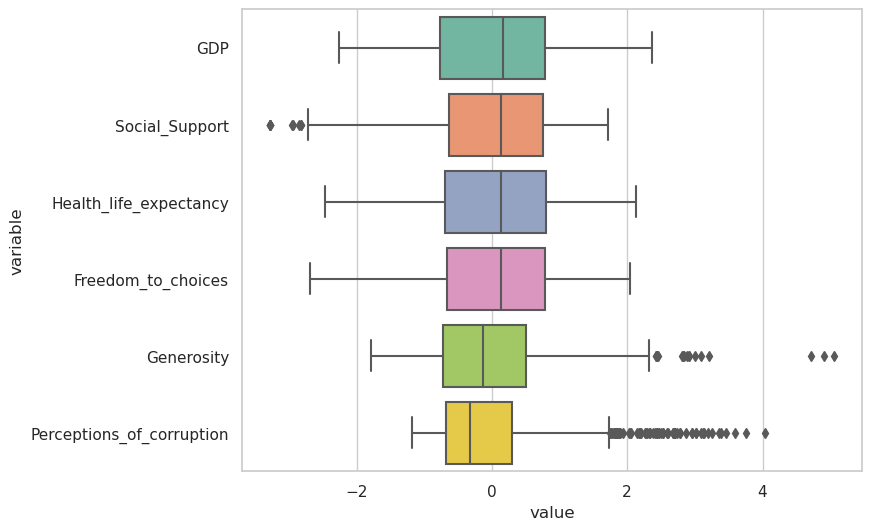

In [16]:
# the distribution of countries based on other features with Box-plot

df2 = pd.DataFrame( df_scaled, columns=features)
df2["Country"] = pd.Series ( df["Country"] , index=df.index)
df3 = pd.melt(df2, id_vars="Country", value_vars=df2[features])
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.boxplot(y= "variable", x="value", data=df3, palette="Set2")
plt.show()

In [17]:
# means and std check

df2[features].describe().loc[["count", "mean", "std"]].round()

,GDP,Social_Support,Health_life_expectancy,Freedom_to_choices,Generosity,Perceptions_of_corruption
count,781.0,781.0,781.0,781.0,781.0,781.0
mean,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


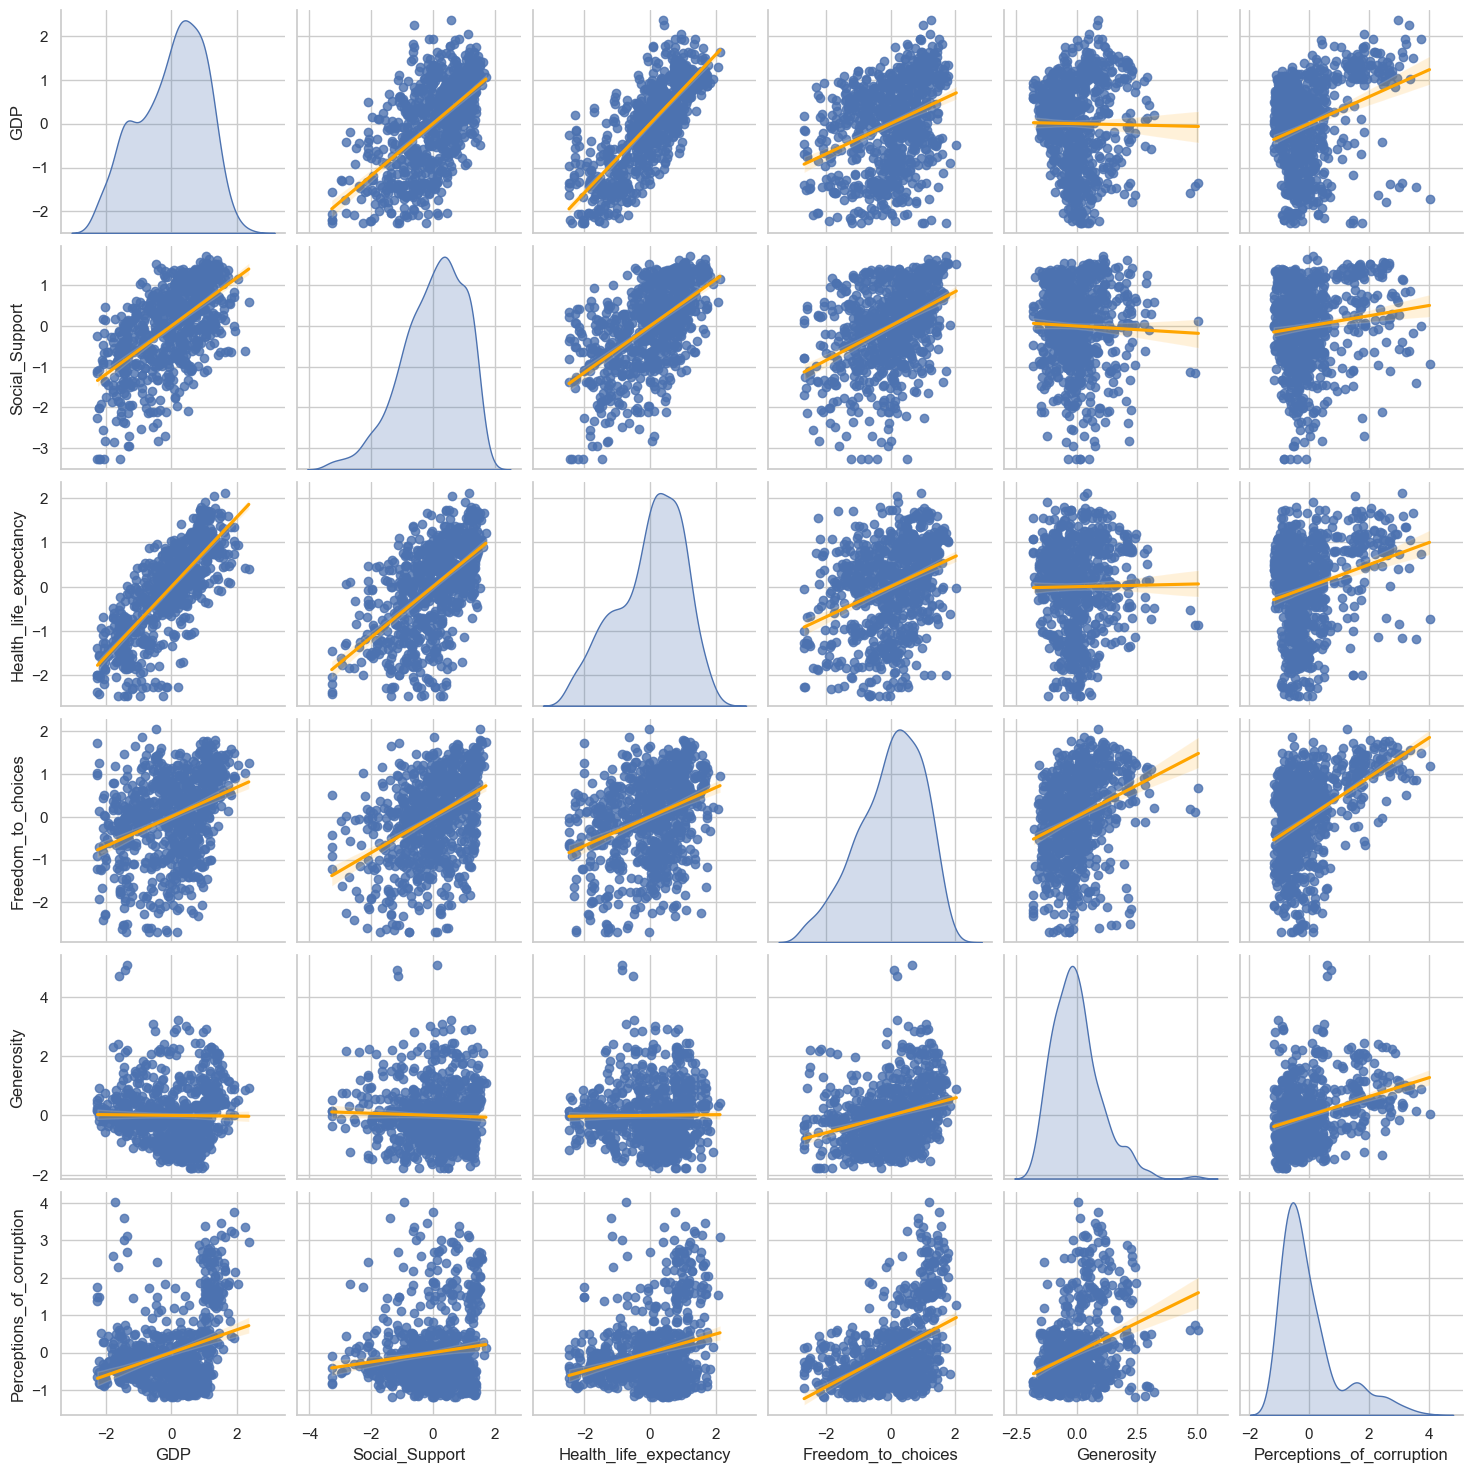

In [17]:
# checking the correlation among features with scatterplots in pairplot

sns.set(style="whitegrid")
sns.pairplot(df2[features], kind = "reg", diag_kind="kde", plot_kws={'line_kws':{'color':'orange'}})
plt.show()

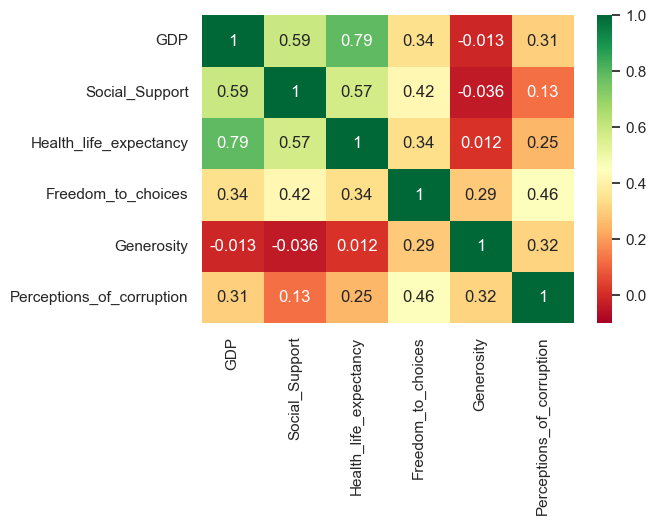

In [18]:
# correlation among features

plt.figure(figsize=(6,4))
sns.set(style="whitegrid")
sns.heatmap(df2[features].corr(method="pearson"), vmin=-.1, vmax=1, annot=True, cmap="RdYlGn")
plt.show()

## PCA hyperparameter

In [19]:
# pip install prince

  Obtaining dependency information for prince from https://files.pythonhosted.org/packages/40/f0/cfbb0ba7128ed1266b04c201fc82de7f93ece72d32e05e13b6fe7cb79733/prince-0.13.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.8/415.8 kB 1.3 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [20]:
import prince
pca = prince.PCA(n_components=6, n_iter=10, rescale_with_mean=False,
rescale_with_std=False, copy=True, check_input=True,
engine= "sklearn" , random_state=42)

# giving the hyperparameter values for PCA model:
# Considering all the 6 components already present.

In [21]:
# assigning PCA model to pca variable

pca = pca.fit(df2[features])

- PCA includes all features without excluding any.
- A large number of features can lead to overfitting.

**NOTE-2**: At this stage, what concerns us in terms of clustering is **how many of the principal components calculated by PCA explain most of the examined event**. In other words, **how many of the calculated principal components are sufficient for meaningful clustering?** For this, the principal components are selected based on the eigenvalues or the components left to the left of the elbow point in the variance graph.

In [22]:
# eigeanvalues of the model

eigeanvalues = pca.eigenvalues_
print(eigeanvalues) 

[2.75885528 1.39933142 0.65216266 0.62441317 0.35925595 0.20598152]


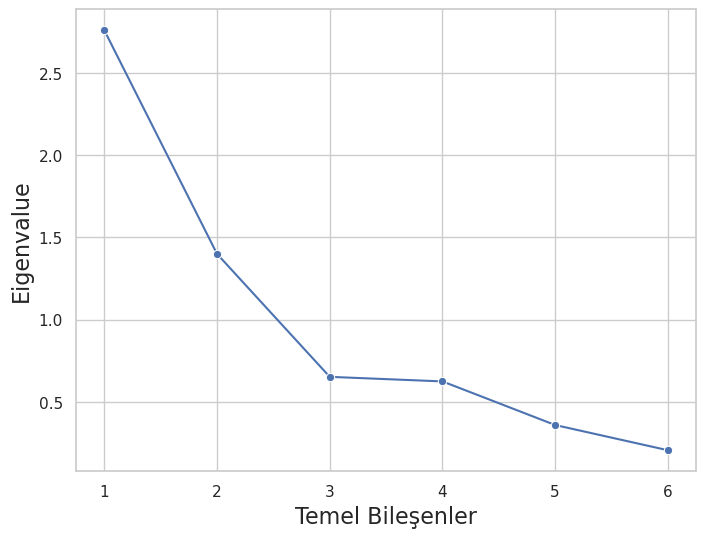

In [23]:
# selecting the optimum principal component numbers with Elbow method

ev = pd.DataFrame()
ev["pca"] = range(1,7)
ev["eigenvalue"]=pd.DataFrame(pca.eigenvalues_)
plt.figure(figsize=(8,6))
sns.lineplot(x="pca", y = "eigenvalue", marker = "o", data= ev)
plt.ylabel("Eigenvalue", fontsize=16)
plt.xlabel("Temel Bileşenler", fontsize=16)
plt.show()

In the graph above, it can be seen that the majority of the variance can be explained by the first 3 components.

In [25]:
# Explained Variance Ratios (cumulative).
# The answer to the question: "How much does each principal component explain the examined event?"

explained_variance=pca.cumulative_percentage_of_variance_
print(explained_variance)

[ 45.98092135  69.30311161  80.17248931  90.57937555  96.56697464
 100.        ]


1st component explains with %45,and 2nd Component with %(69-45)

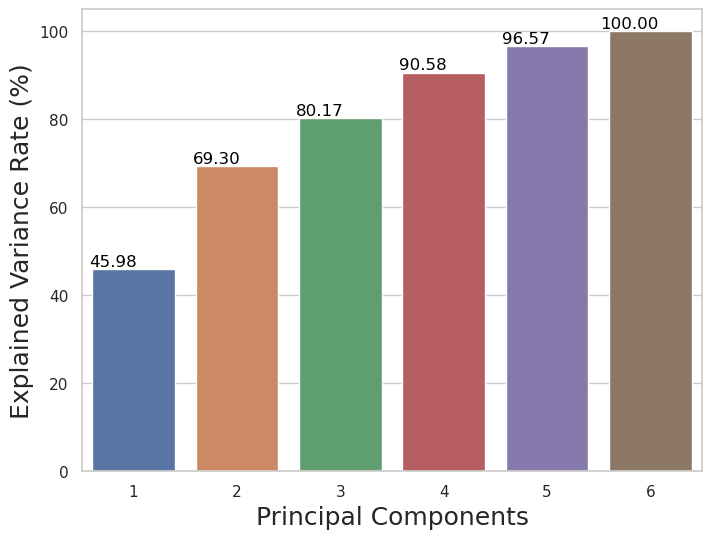

In [26]:
# Explained Variance Ratios (cumulatively).
# Base Rule: How many principal components explain at least 80% of the variance?

avo = pd.DataFrame()
avo["pca"] = range(1,7)
avo["vari"] = pd.DataFrame(pca.cumulative_percentage_of_variance_)

plt.figure(figsize=(8,6))
graph = sns.barplot(x="pca", y ="vari", data=avo)

for p in graph.patches :
    graph.annotate('{:.2f}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()), ha="center", va="bottom", color="black")

plt.ylabel("Explained Variance Rate (%)", fontsize=18)
plt.xlabel("Principal Components", fontsize=18)
plt.show()  

As can be understood from the graph above, the 1st Principal Component explains 46% of the total variance, the 1st and 2nd Principal Components together explain 69%, and the 1st, 2nd, and 3rd Principal Components together explain 80% of the variance. 

In other words, all three together explain 80% of the story (variance).

**As a rule of thumb, an explained variance of 80% or higher can be considered an acceptable threshold.**

**IMPORTANT**: Naturally, one might ask, is it worth doing all this transformation just to reduce 6 features to 3? 
The answer: It might not be worth the effort for 6 features. However, in today's world, where every device generates data, it is definitely worth it when dealing with datasets consisting of hundreds of features.

In [27]:
# Column correlation 

correlations = pca.column_correlations
correlations

component,0,1,2,3,4,5
variable,,,,,,
GDP,-0.849453,-0.290508,0.138698,0.240835,-0.073758,0.333700
Social_Support,-0.753313,-0.318772,-0.351864,-0.200843,0.406542,-0.038493
Health_life_expectancy,-0.833135,-0.297670,0.060866,0.291166,-0.198543,-0.298960
Freedom_to_choices,-0.676792,0.405925,-0.188871,-0.495832,-0.308085,0.027188
Generosity,-0.192159,0.787475,-0.388752,0.434315,0.053360,0.018787
Perceptions_of_corruption,-0.529828,0.582942,0.564457,-0.082562,0.226620,-0.051719


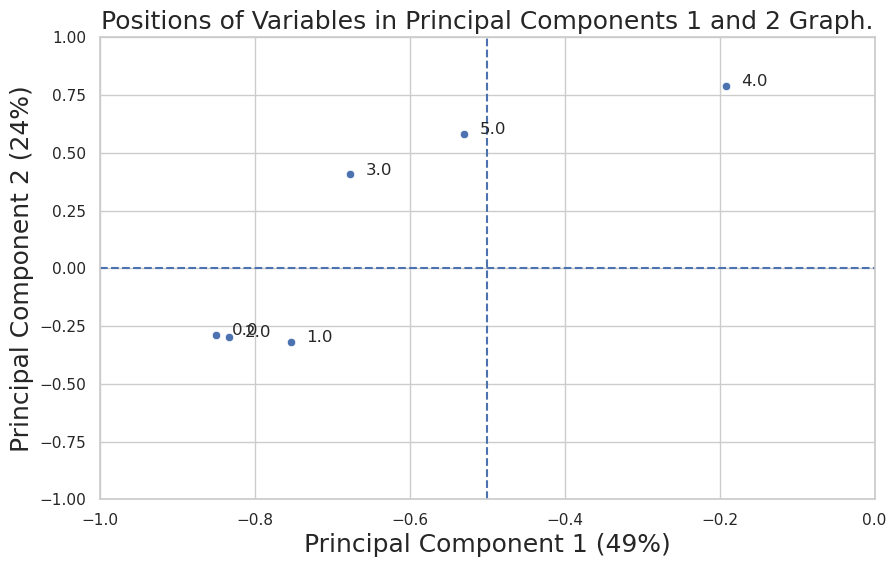

In [28]:
# Positions of Variables in Principal Components 1 and 2 Graph.

scatter = pca.column_correlations.reset_index()

plt.figure(figsize=(10,6))

ax = sns.scatterplot(x=0, y=1, data=scatter)
ax.set(ylim=(-1,1), xlim=(-1,0))

def label_point(x, y, val, ax):
    a = pd.concat({"x": x, "y": y, "val": pd.Series(val)}, axis=1)  # use the scatter.index'i as Series
    for i, point in a.iterrows():
        ax.text(point["x"]+.02, point["y"], str(point["val"]))

label_point(scatter[0], scatter[1], scatter.index, plt.gca())
plt.axvline(-0.5, ls="--")
plt.axhline(0, ls="--")
plt.title("Positions of Variables in Principal Components 1 and 2 Graph.", fontsize=18)
plt.xlabel("Principal Component 1 (49%)", fontsize=18)
plt.ylabel("Principal Component 2 (24%)", fontsize=18)
plt.show()

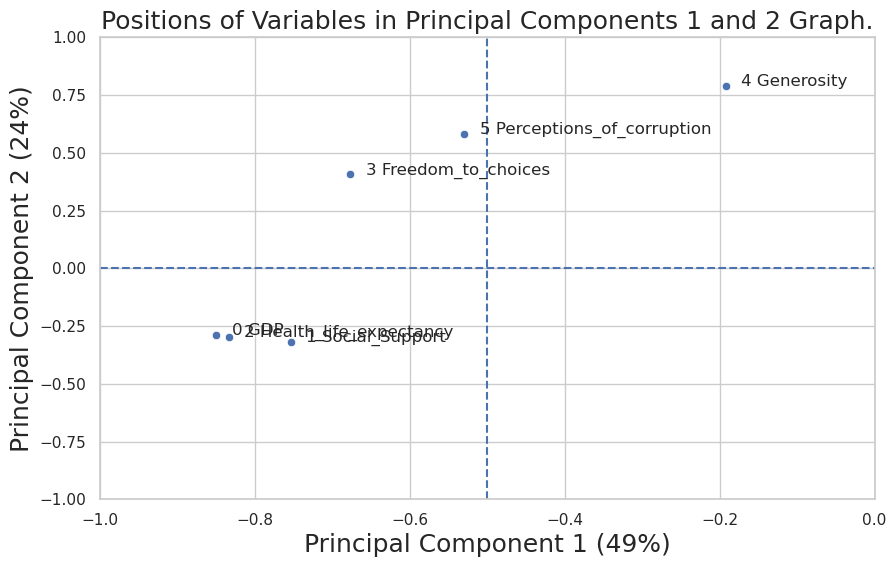

In [29]:
# Positions of Variables in Principal Components 1 and 2 Graph.
scatter = pca.column_correlations.reset_index()


plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=0, y=1, data=scatter)
ax.set(ylim=(-1,1), xlim=(-1,0))
def label_point(x, y, val,lab, ax):
    a = pd.concat({"x": x, "y": y, "val": pd.Series(val),"a":lab}, axis=1)  # use the scatter.index'i as Series
    for i, point in a.iterrows():
        ax.text(point["x"]+.02, point["y"], f'{str(point["val"])} {str(point["a"])}' )
label_point(scatter[0], scatter[1], scatter.index, scatter.variable,plt.gca())
plt.axvline(-0.5, ls="--")
plt.axhline(0, ls="--")
plt.title("Positions of Variables in Principal Components 1 and 2 Graph.", fontsize=18)
plt.xlabel("Principal Component 1 (49%)", fontsize=18)
plt.ylabel("Principal Component 2 (24%)", fontsize=18)
plt.show()

**NOTE**: The graph above is quite useful in showing which features are close to each other (groupings between features). Based on the first two principal components, three groups of variables can be observed: i) GDP, Social Support, and Healthy Life Expectancy, ii) Freedom to Make Life Choices and Perception of Corruption (points 3.0 and 5.0 in the graph), and iii) Generosity (point 4.0 in the graph).

## Cluster Prediction

In [30]:
# Let's predict the clusters that countries belong to

# Clustering prediction based on the 1st and 2nd principal component pair

x_pca = pca.transform(df2[features])
x_pca.head()

component,0,1,2,3,4,5
0,-3.288539,1.521011,1.196249,-0.343118,0.226529,-0.255045
1,-2.445729,0.902356,-1.244080,0.607152,-0.418476,-0.126588
2,-3.268610,2.121851,1.406908,-0.299633,0.676998,-0.274341
3,-3.119707,1.580386,0.664560,-0.102444,0.069617,0.088780
4,-2.862612,1.240375,1.422209,-0.654648,0.275983,-0.327535


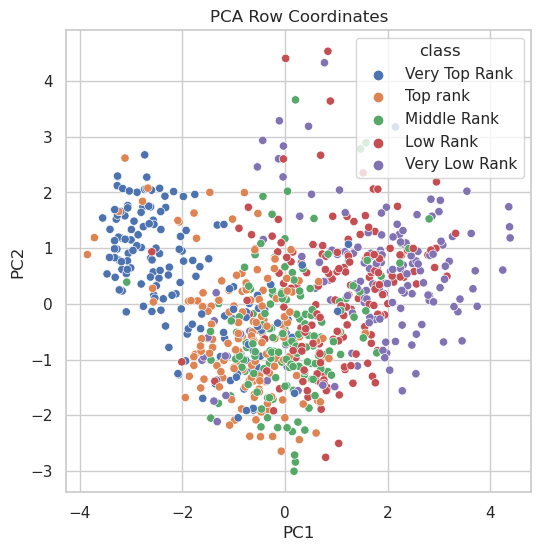

In [31]:
# dividing the countries to 5 clusters (classes) 
row_coords = pca.row_coordinates(df2[features])

plt.figure(figsize=(6,6))
ax = sns.scatterplot(
    x=row_coords.iloc[:, 0],  
    y=row_coords.iloc[:, 1],  
    hue=df["class"]           
)

ax.set_title("PCA Row Coordinates")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [33]:
# Clustering predictions based on different principal component pairs.

pd.DataFrame.iteritems = pd.DataFrame.items
import plotly.express as px
from plotly.offline import plot
components = pca.fit_transform(df2[features])
labels = {str(i): f"PC {i+1} ({var:.1f}%)"
          for i, var in enumerate(pca.cumulative_percentage_of_variance_)}
fig = px.scatter_matrix(components, labels=labels, dimensions=range(4),
                        color=df["class"])
fig.update_traces(diagonal_visible=False)
plot(fig)

'temp-plot.html'

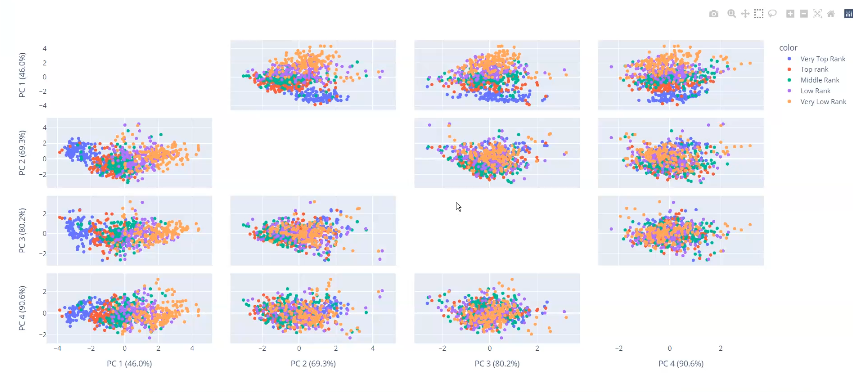

**On the webpage opened with the above code**:

The visualization tool from the Plotly Express library does not consider principal components with a low variance ratio. It sorts the principal components from largest to smallest and only takes into account those that reach a total variance of 90%.

A benefit of this visual tool is its interactivity: when hovering over any data point (in this case, countries represent the data points), it provides the coordinates within the principal component pair and shows the country's group.

## 3D Visualization - Clustering with 3 Principal Component

In [34]:
from mpl_toolkits.mplot3d import Axes3D

In [35]:
# Clustering with 3 Principal Components

# Convert the categorical terms in df['class'] into numerical values
df["nclass"] = df["class"].cat.codes
df["nclass"].unique()

# Create a matrix by taking the coordinates of the data points with the principal components
x_pca = pca.transform(df2[features]).to_numpy()
x_pca
# NOTE: Since Axes3D works with NumPy arrays, we converted the matrix formatted as a Pandas DataFrame into a 
# NumPy array using the `.to_numpy()` function.
# If we hadn't added this, the `x_pca` matrix would have been stored in DataFrame format, and the 3D plot wouldn't be 
# able to recognize this format, resulting in the graph not being generated.

array([[-3.28853863,  1.5210113 ,  1.19624908, -0.34311781,  0.22652872,
        -0.25504468],
       [-2.44572929,  0.90235623, -1.24407988,  0.60715218, -0.41847557,
        -0.12658762],
       [-3.26861024,  2.12185133,  1.40690846, -0.29963332,  0.67699797,
        -0.27434064],
       ...,
       [ 3.29228399, -0.04986696,  0.76552954,  1.06516293,  0.78519035,
        -0.25904117],
       [ 1.64052549, -0.33799056,  0.46180151, -1.29685418,  1.25230116,
         1.32142685],
       [-1.16339935, -0.93605361, -0.61102417,  0.86788421,  0.20820568,
         0.44390604]])

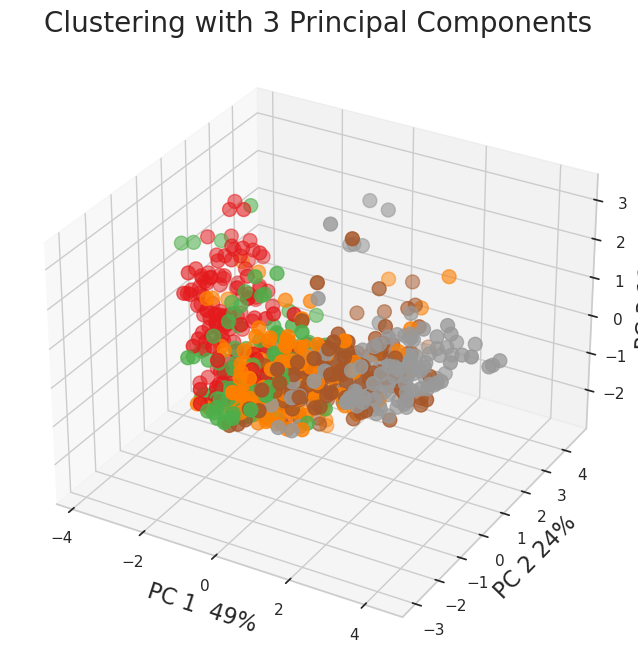

In [36]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')  


ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=df["nclass"], s=100, cmap="Set1")

ax.set_title("Clustering with 3 Principal Components", fontsize=20)
ax.set_xlabel("PC 1  49%", fontsize=16)
ax.set_ylabel("PC 2 24%", fontsize=16)
ax.set_zlabel("PC 3 11%", fontsize=16)

plt.show()

The visual shows the examples in the dataset in terms of the three main principal components (PC1, PC2, PC3), and each point represents an observation in the dataset (for example, a country or situation). PCA is used to reduce the dimensionality of multi-dimensional data and capture the most important variance in the dataset.

In [37]:
# Let's examine the contribution of each feature to the variance explained in each principal component by 
# organizing the Eigenvectors into a table.

t = pd.concat([pca.column_correlations, df2[features]], axis=1)
t = t.transpose()
features_names = pd.Series(t.columns)
s = pd.Series(["PCA1", "PC2", "PC3", "PC4", "PC5", "PC6"])

# Add the 's' Series as a new column to the 't' DataFrame
t["PC_Label"] = s

# Set the 'PC_Label' column as the index
t = t.set_index("PC_Label")

# Convert the 't' DataFrame to an array and round the values for preparing the graph
t = t.to_numpy()
t = t.round(2)


The heatmap part is in separate notebook